# Ejercicio:
### Una empresa de manufactura produce dos tipos de productos: mesas y sillas. La empresa quiere maximizar sus ganancias a partir de la producción de estos dos productos. La ganancia obtenida por cada mesa es de $$50 , y por cada silla es de $30. Sin embargo, la empresa tiene limitaciones en términos de recursos y capacidad de producción.


### Datos:

- Función de Costo (Ganancia): La función que representa la ganancia total de la empresa es:

$$Z=50x+30y$$

donde $x$ es el número de mesas producidas e
$y$ es el número de sillas producidas.

###Restricciones:

- Restricción de Materiales: La empresa dispone de un total de 500 unidades de materiales. Cada mesa utiliza 5 unidades de materiales y cada silla utiliza 2 unidades de materiales. La restricción es:

$$5x+2y≤500$$

- Restricción de Horas de Trabajo: La empresa tiene un total de 400 horas de trabajo disponibles. Cada mesa requiere 4 horas de trabajo y cada silla requiere 3 horas de trabajo. La restricción es:


$$4x+3y≤400$$

- Restricción de No Negatividad: La empresa no puede producir una cantidad negativa de productos:

$$x≥0$$

$$y≥0$$

### Objetivo: Maximizar la ganancia total $z$ bajo las restricciones dadas.

Punto a Evaluar: Determina el valor de la función de costo en el punto donde la empresa decide producir 30 mesas y 50 sillas.

Ingresa la función de costo en términos de x e y (por ejemplo, '4*x + 5*y'):  50*x + 30*y
Ingresa una restricción en la forma 'a*x + b*y <= c' o 'a*x + b*y >= c' (o escribe 'fin' para terminar):  5*x + 2*y <= 500
Ingresa una restricción en la forma 'a*x + b*y <= c' o 'a*x + b*y >= c' (o escribe 'fin' para terminar): 4*x + 3*y <= 400
Ingresa una restricción en la forma 'a*x + b*y <= c' o 'a*x + b*y >= c' (o escribe 'fin' para terminar): 30
Error al ingresar la restricción: list index out of range. Por favor, intentalo de nuevo.
Ingresa una restricción en la forma 'a*x + b*y <= c' o 'a*x + b*y >= c' (o escribe 'fin' para terminar): fin
Ingresa el valor de x: 30
Ingresa el valor de y: 50
El valor de la función de costo en el punto (30.0, 50.0) es: 3000.00000000000


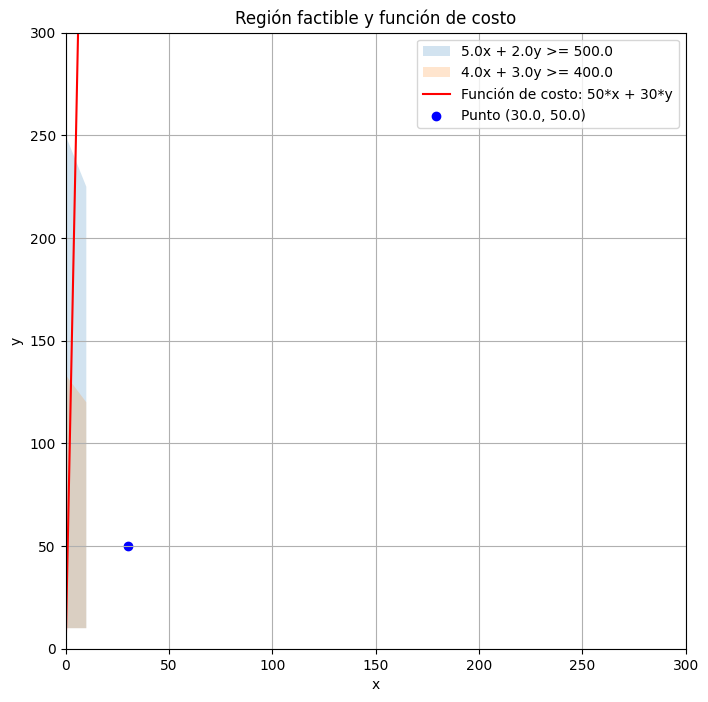

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Función para calcular el valor de la función de costo
def funcion_de_costo(func, x_val, y_val):
    # Evaluar la función de costo en el punto (x, y)
    x, y = sp.symbols('x y')
    return func.subs({x: x_val, y: y_val})

# Función para graficar la región factible
def graficar_region_factible(constraints, func, x_val, y_val):
    # Crear un rango de valores para x
    x_vals = np.linspace(0, 10, 400)

    plt.figure(figsize=(8, 8))

    # Iterar sobre cada restricción
    for constraint in constraints:
        if constraint['type'] == 'line':
            # Evaluar la restricción en y dependiendo de los valores de x
            y_vals = (constraint['value'] - constraint['x'] * x_vals) / constraint['y']
        else:
            # Usar un valor constante para las restricciones de tipo horizontal
            y_vals = np.full_like(x_vals, constraint['value'])

        if constraint['sign'] == '<=':
            plt.fill_between(x_vals, 0, y_vals, alpha=0.2, label=f"{constraint['x']}x + {constraint['y']}y <= {constraint['value']}")
        else:
            plt.fill_between(x_vals, y_vals, 10, alpha=0.2, label=f"{constraint['x']}x + {constraint['y']}y >= {constraint['value']}")

    # Graficar la función de costo como una línea
    func_lambda = sp.lambdify((x, y), func)
    plt.plot(x_vals, func_lambda(x_vals, 0), label=f"Función de costo: {func}", color='red')

    # Marcar el punto dado por el usuario
    plt.scatter(x_val, y_val, color='blue', label=f'Punto ({x_val}, {y_val})')

    plt.xlim(0, 300)
    plt.ylim(0, 300)

    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.title("Región factible y función de costo")
    plt.grid(True)
    plt.show()

# Función para ingresar restricciones
def ingresar_restricciones():
    constraints = []
    while True:
        try:
            restriccion = input("Ingresa una restricción en la forma 'a*x + b*y <= c' o 'a*x + b*y >= c' (o escribe 'fin' para terminar): ")
            if restriccion.lower() == 'fin':
                break

            # Parsear la restricción
            parts = restriccion.replace('<=', ' <= ').replace('>=', ' >= ').split()
            a = float(parts[0].replace('*x', '').replace('x', ''))
            b = float(parts[2].replace('*y', '').replace('y', ''))
            operador = parts[1]
            c = float(parts[4])

            constraints.append({
                'x': a,
                'y': b,
                'value': c,
                'sign': operador,
                'type': 'line'
            })
        except Exception as e:
            print(f"Error al ingresar la restricción: {e}. Por favor, intentalo de nuevo.")

    return constraints

# Solicitar valores al usuario
try:
    # Pedir la función de costo al usuario
    funcion_usuario = input("Ingresa la función de costo en términos de x e y (por ejemplo, '4*x + 5*y'): ")

    # Convertir la función ingresada en una expresión simbólica
    x, y = sp.symbols('x y')
    funcion_simb = sp.sympify(funcion_usuario)

    # Solicitar las restricciones al usuario
    restricciones = ingresar_restricciones()

    # Solicitar el punto (x, y)
    x_val = float(input("Ingresa el valor de x: "))
    y_val = float(input("Ingresa el valor de y: "))

    # Calcular el valor de la función de costo en el punto (x, y)
    valor_costo = funcion_de_costo(funcion_simb, x_val, y_val)
    print(f"El valor de la función de costo en el punto ({x_val}, {y_val}) es: {valor_costo}")

    # Graficar la región factible y la función de costo
    graficar_region_factible(restricciones, funcion_simb, x_val, y_val)

except ValueError:
    print("Por favor, ingresa valores numéricos válidos.")
except (sp.SympifyError, SyntaxError):
    print("La función ingresada no es válida.")
